# ID2222 hw4 Spectral Clustering

In [47]:
import numpy as np
import networkx as nx
from networkx import DiGraph
import scipy.linalg as la
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [48]:
# 1. Form affinity matrix
#    A_ij = exp(-|s_i - s_j|^2 / (2*sigma^2))
def form_adj_matrix(G):
    A = np.asarray(nx.adjacency_matrix(G).todense())
#     print("_____________________")
#     print(A)
#     print("_____________________")
    print("length of A", len(A))

    plt.imshow(A)
    plt.show()
    
    return A

In [49]:
# 2. Define D to be the diagonal matrix whose (i, i) element is the sum of A's i-th row
#    and construct the matrix L = D ^ (-0.5) A D^(-0.5)
def form_L_matrix(A):
    # diagonal matrix
    D = np.diag(np.sum(A, axis=1))

    D_inverse = np.linalg.inv(np.sqrt(D))
#     I = np.eye(len(D))
#     print("I", I)
#     L = I - (D_inverse @ A @ D_inverse)
    
    L = D_inverse @ A @ D_inverse
#     print("L", L)
    return L

In [50]:
# 3. Find x1, x2...xk, the k largest eigenvectors of L (chosen to be orthognal to each other)
#    and form the matrix X = [x1x2...xk] by stacking the eigenvectors in columns

def form_X_matrix_with_eigenvectors(L):
    # get the eigenvalues and eigenvectors of L
    eigenvalues, eigenvectors = la.eigh(L) 
#     temp = la.eigvals(L)
    ##############################
    # eigen value ascending
    # print(eigenvalues)

    # the fiedler vector is the eigenvector corresponding to the 2nd smallest eigenvalue 
#     fiedler_vector = sorted(eigenvectors[:, -2]) 
#     print("eigen values", eigenvalues)
#     print("temp", temp)


#     fiedler_vector = sorted(eigenvectors[:, 1]) 
#     plt.plot(fiedler_vector)
#     plt.show()
    ###############################

    # compute the k
    eigen_values_diff = np.diff(eigenvalues)
    index_largest_diff = np.argmax(eigen_values_diff) + 1

    # print(index_largest_diff)

    # from big to small, find the k with the biggest |k_n-k_n-1|
    # previous sorted is from small to big
    k = len(eigenvalues) - index_largest_diff

    print("k is", k)
    X = eigenvectors[:, -k:]
    return k, X

In [51]:
# 4. Form the matrix Y from X by renormalizing each of X's rows to have
#    unit length (i.e. Y_ij = X_ij / sum(X_ij^2)^1/2)
def form_Y_matrix(X):
    Y = X / np.sqrt(np.sum(pow(X, 2), axis=1)).reshape((-1,1))
    return Y

In [52]:
# 5. Treating each row of Y as a point in R^k, cluster them into k clusters via
#    K-means or any other algorithm (that attempts to minimize distortion)
def k_means_clustering(k, Y):
    clustering = KMeans(n_clusters=k).fit(Y)
    return clustering

In [53]:
# 6. Finally, assign the original point s_i to cluster j iff.
#    row i of the matrix Y was assigned to cluster j
def print_result_graph(clustering, Y, G):
    print("length of clustering labels", len(clustering.labels_))
    print("clustering labels: ")
    print(clustering.labels_)
    
    nx.draw_networkx(G, node_size=10, node_color=clustering.labels_, with_labels=False)
    plt.show()

length of A 241


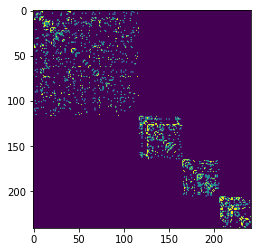

k is 4
length of clustering labels 241
clustering labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


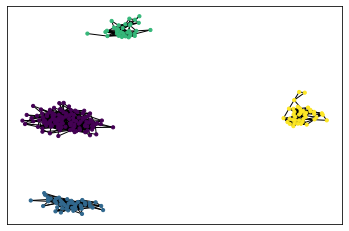

In [54]:
# example 1

path = "data/example1.dat"
G = nx.read_edgelist(path, delimiter=",")
len(G.nodes)
# list(G.nodes)
# pos = nx.spring_layout(graph)

A = form_adj_matrix(G)
L = form_L_matrix(A)
k, X = form_X_matrix_with_eigenvectors(L)
Y = form_Y_matrix(X)
clustering = k_means_clustering(k, Y)
print_result_graph(clustering, Y, G)

length of A 100


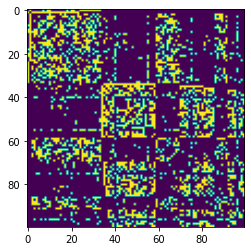

k is 2
length of clustering labels 100
clustering labels: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0]


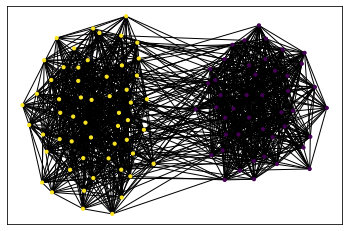

In [55]:
# example 2
path2 = "data/example2.dat"
G2 = nx.read_weighted_edgelist(path2, delimiter=",")
len(G2.nodes)

A2 = form_adj_matrix(G2)
L2 = form_L_matrix(A2)
k2, X2 = form_X_matrix_with_eigenvectors(L2)
Y2 = form_Y_matrix(X2)
clustering2 = k_means_clustering(k2, Y2)
print_result_graph(clustering2, Y2, G2)

In [56]:
def sort_cluster_count(labels):
    res = dict()
    for i in labels:
        if i in res.keys():
            res[i] = res[i] + 1
        else:
            res[i] = 1
    return sorted(list(res.values()))

In [57]:
# this is to validate the results
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(4, affinity='precomputed', n_init=100)
sc.fit(A)

assert sort_cluster_count(sc.labels_) == sort_cluster_count(clustering.labels_)

C:\Users\Spycsh\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [58]:
# this is to validate the results
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(2, affinity='precomputed', n_init=100)
sc.fit(A2)

assert sort_cluster_count(sc.labels_) == sort_cluster_count(clustering2.labels_)